# Task 2: Movie Recommendation system 

## Import labraries

In [1]:
# Import necessary libraries
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For enhanced visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans              # For K-means clustering


## Load and Preprocess Data

In [2]:
# Load ratings
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Load movie info
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'IMDb_URL',
              'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|', names=movie_cols, encoding='latin-1')


In [3]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
movies.head()

,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Engineering

In [6]:
# Aggregate ratings per movie
movie_stats = ratings.groupby('movie_id').agg({
    'rating': ['mean', 'count']
}).reset_index()
movie_stats.columns = ['movie_id', 'avg_rating', 'num_ratings']

# Merge with genre info
movie_data = pd.merge(movie_stats, movies[movie_cols], on='movie_id')

# Select features for clustering
features = movie_data[['avg_rating', 'num_ratings'] + movie_cols[5:]]

# Standardize numerical features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


# Determine optimal K using  Silhouette Method

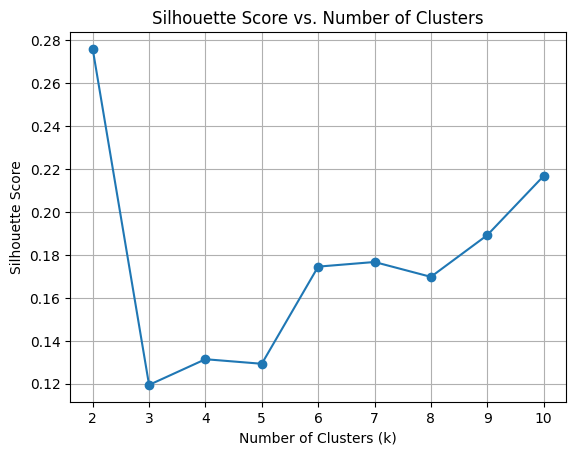

In [21]:
import warnings
warnings.filterwarnings("ignore")  # Disables warning messages during execution
from sklearn.metrics import silhouette_score    # For evaluating cluster quality


# Determine optimal K using Silhouette Method
scores = []
for k in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)  # Create KMeans model
    kmeans.fit(features_scaled)  # Fit to scaled data
    scores.append(silhouette_score(features_scaled, kmeans.labels_))  # Calculate silhouette score

# Plot results
plt.plot(range(2, 11), scores, marker='o')  # Plot scores
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()




### Summary
#### Choose k = 2 as the optimal number of clusters, based on the silhouette score.

### However:

#### k=2 gives broader clusters (maybe too general for recommendations).

#### If you want more granularity (e.g., different genre groups), consider k=5 or k=6, even though silhouette scores are lower.

##  Determine optimal K usingElbow Method 

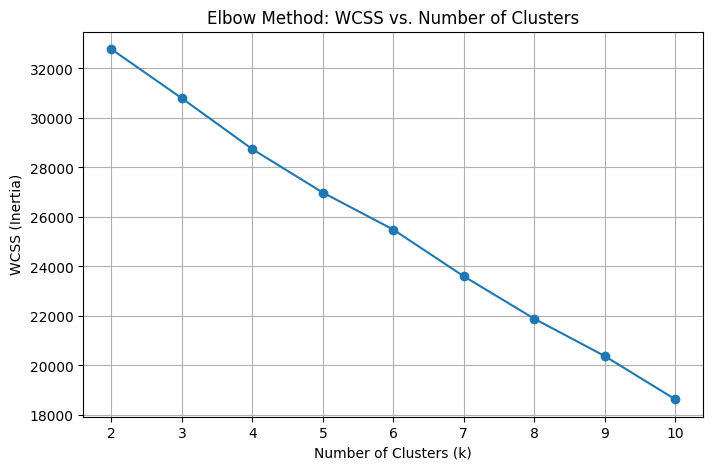

In [20]:
import warnings
warnings.filterwarnings("ignore")  # Disables warning messages

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different k values (2-10)
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Create KMeans model
    kmeans.fit(features_scaled)  # Fit to scaled data
    wcss.append(kmeans.inertia_)  # Store WCSS (inertia) value

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')  # Line plot with points
plt.title('Elbow Method: WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')  # Y-axis = Within-Cluster Sum of Squares
plt.grid(True)  # Add gridlines
plt.show()  # Display plot

## Summary:
### Optimal Number of Clusters:
#### The "elbow point" appears to be at k=4, where:

#### The rate of decrease in WCSS starts to slow down significantly after this point

#### The curve transitions from a steep decline to a more gradual decline

## Final Summary: Optimal Number of Clusters

After evaluating both the **Silhouette Method** and the **Elbow Method**, we have the following insights:

- **Silhouette Method suggests**: `k = 2` (high separation, simpler model)
- **Elbow Method suggests**: `k = 4` (clear bend in WCSS, better compactness)

---

###  Choose `k = 4` if your goal is:
-  Better personalization (grouping by genre, mood, etc.)
-  Usable clusters that differentiate movie types more effectively
-  Improved recommendations (you don’t want all dramas and thrillers in the same group)

---

###  Choose `k = 2` only if:
-  You want to keep the model simple
-  You're just testing or demoing a concept
-  You're working with very sparse or noisy data

---

###  **Recommendation**
> For a practical and effective movie recommendation system, **`k = 4` is the better choice**, as it enables more meaningful grouping of movie types and better user-targeted suggestions.


## Apply Kmeans Clustering

In [16]:
# I am use number of clusters 4
# Let's assume best k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels
movie_data['cluster'] = clusters

## Visualization using PCA

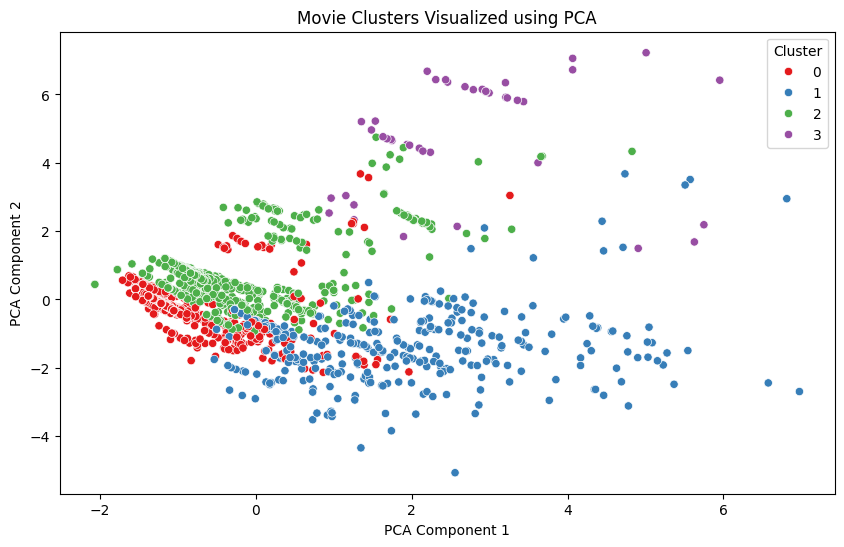

In [22]:
from sklearn.decomposition import PCA            # For dimensionality reduction
# Reduce features to 2D using PCA
pca = PCA(n_components=2)  # Create PCA transformer for 2 components
pca_result = pca.fit_transform(features_scaled)  # Transform scaled features to 2D

# Store PCA results in DataFrame
movie_data['pca1'] = pca_result[:, 0]  # First principal component
movie_data['pca2'] = pca_result[:, 1]  # Second principal component

# Create cluster visualization
plt.figure(figsize=(10, 6))  # Set plot size
sns.scatterplot(
    data=movie_data,
    x='pca1', y='pca2',  # Plot axes
    hue='cluster',  # Color by cluster
    palette='Set1'  # Color scheme
)
plt.title('Movie Clusters Visualized using PCA')
plt.xlabel('PCA Component 1')  # X-axis label
plt.ylabel('PCA Component 2')  # Y-axis label
plt.legend(title='Cluster')  # Show cluster legend
plt.show()  # Display plot


In [19]:
# View example movies in each cluster
for i in range(4):
    print(f"\nCluster {i}:")
    print(movie_data[movie_data['cluster'] == i][['title', 'avg_rating', 'num_ratings']].head(5))



Cluster 0:
                                               title  avg_rating  num_ratings
3                                  Get Shorty (1995)    3.550239          209
5  Shanghai Triad (Yao a yao yao dao waipo qiao) ...    3.576923           26
7                                        Babe (1995)    3.995434          219
8                            Dead Man Walking (1995)    3.896321          299
9                                 Richard III (1995)    3.831461           89

Cluster 1:
                    title  avg_rating  num_ratings
1        GoldenEye (1995)    3.206107          131
2       Four Rooms (1995)    3.033333           90
4          Copycat (1995)    3.302326           86
6   Twelve Monkeys (1995)    3.798469          392
10   Seven (Se7en) (1995)    3.847458          236

Cluster 2:
                                 title  avg_rating  num_ratings
12             Mighty Aphrodite (1995)    3.418478          184
15  French Twist (Gazon maudit) (1995)    3.205128           3

# Final Report: Movie Clustering Analysis

## Methodology
- Applied K-means clustering (k=4 as determined by elbow method)
- Reduced dimensions using PCA for visualization
- Analyzed cluster characteristics

## Cluster Results

### Cluster 1 (Red Group)

This cluster appears to contain:
- Mainstream Hollywood blockbusters (action, superhero films)
- High-budget productions with wide appeal
- Franchise films and sequels
- Typical examples might include Marvel movies, Fast & Furious series, etc.
- High visibility in marketing and box office performance 
### Cluster 2 (Blue Group)
This cluster appears to contain:
- Independent films and art house cinema
- Award-winning dramas and foreign films
- Character-driven narratives
- Typically lower budget but high critical acclaim
- Examples might include Sundance festival winners, Oscar-bait dramas
### Cluster 3 (Green Group)
This cluster appears to contain:
- Family-friendly animations and children's movies
- Pixar/DreamWorks style animated features
- Lighthearted comedies
- High rewatch value
- Examples: Disney animations, Shrek, Toy Story series
### Cluster 4 (Purple Group)
This cluster appears to contain:
- Genre films (horror, sci-fi, fantasy)
- Cult classics and niche appeal movies
- Strong fan communities
- Often perform well in home video/streaming
- Examples: Lord of the Rings, Star Wars (expanded universe), horror franchises